In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [30]:
data = pd.read_csv('data.csv')
data.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,model,running,fuel_type,gear_type,registered_in,color,...,last_update,ad_ref_no,car_features,posted_location,dealer_information,price,seller_comments_desc,images1-src,image2-src,device
0,1671309883-45,https://www.pakwheels.com/used-cars/search/-/?...,Suzuki Wagon R 2020 VXR for Sale,https://www.pakwheels.com/used-cars/suzuki-wag...,2020,"39,265 km",Petrol,Manual,Islamabad,White,...,"Nov 03, 2022",6812591,"[{""car_features"":""AM/FM Radio""},{""car_features...","D-12, Islamabad Islamabad","Ashar Warsi\n Member Since Oct 19, 2016",PKR 20.75 lacs\n \n ...,"100% original condition, bumper to bumper genu...",https://cache4.pakwheels.com/ad_pictures/7481/...,https://cache2.pakwheels.com/ad_pictures/7481/...,Added via Phone
1,1671309886-46,https://www.pakwheels.com/used-cars/search/-/?...,Suzuki Mehran 2017 VX Euro II for Sale,https://www.pakwheels.com/used-cars/suzuki-meh...,2017,"50,000 km",Petrol,Manual,Sindh,Gold,...,"Nov 03, 2022",6603411,"[{""car_features"":""AM/FM Radio""},{""car_features...","Abul Hassan Isphani Road, Karachi Sindh","Pw User16518695137\n Member Since May 07,...",PKR 8 lacs\n \n ...,mehran 2017 euro 2 \nfirst owner\nneat and cle...,https://cache2.pakwheels.com/ad_pictures/7181/...,https://cache2.pakwheels.com/ad_pictures/7181/...,Added via Phone


In [31]:
data.shape

(75647, 23)

In [32]:
for col in data.columns:
    print(col)

web-scraper-order
web-scraper-start-url
title
title-href
model
running
fuel_type
gear_type
registered_in
color
assembly
engine_capacity
body_type
last_update
ad_ref_no
car_features
posted_location
dealer_information
price
seller_comments_desc
images1-src
image2-src
device


In [33]:
df = data

In [34]:
# Define function to convert string to number
def convert_to_number(string):
    if string.startswith('PKR'):
        if 'lacs' in string:
            return float(string.split()[1]) * 100000
        elif 'crore' in string:
            return float(string.split()[1]) * 10000000
        else:
            return None
    else:
        return None

# Apply function to column and create new column with numeric values
df['new_price'] = df['price'].apply(convert_to_number)

# Show updated column
print(df['new_price'])

0         2075000.0
1          800000.0
2         1750000.0
3         3300000.0
4         1160000.0
            ...    
75642     1350000.0
75643    12200000.0
75644     2550000.0
75645     1645000.0
75646     2545000.0
Name: new_price, Length: 75647, dtype: float64


In [35]:
df = df.dropna()

In [36]:
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')
df['running'] = df['running'].str.replace(',', '')
df['running'] = df['running'].str.replace('km', '')


df.rename(columns={'engine_capacity':'engine_capacity (cc)'},inplace=True)
df.rename(columns={'running':'running (km)'},inplace=True)

df = df[~df['engine_capacity (cc)'].str.contains('kWh')]

df = df.astype({'running (km)':'int64'})
df = df.astype({'engine_capacity (cc)':'int64'})
df = df.astype({'new_price':'int64'})

df.drop(['title','price','last_update','seller_comments_desc','device','posted_location','dealer_information','ad_ref_no','car_features','title-href','web-scraper-order','web-scraper-start-url','images1-src','image2-src'],inplace=True,axis=1)

C:\Users\MOIZ\AppData\Local\Temp\ipykernel_3320\886039933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')
C:\Users\MOIZ\AppData\Local\Temp\ipykernel_3320\886039933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['running'] = df['running'].str.replace(',', '')
C:\Users\MOIZ\AppData\Local\Temp\ipykernel_3320\886039933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['gear_type'] = le.fit_transform(df['gear_type'])
df['assembly']  = le.fit_transform(df['assembly'])
df['color']     = le.fit_transform(df['color'])
df['body_type'] = le.fit_transform(df['body_type'])
df['registered_in'] = le.fit_transform(df['registered_in'])

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.head()

,model,running (km),fuel_type,gear_type,registered_in,color,assembly,engine_capacity (cc),body_type,new_price
0,2020,39265,4,1,21,276,1,1000,7,2075000
1,2017,50000,4,1,57,69,1,796,7,800000
4,2004,120000,4,1,21,237,0,1300,15,1160000
6,2022,1,4,1,63,276,1,660,7,2250000
7,2004,65000,4,1,24,247,1,1000,7,690000


In [40]:
df = np.log10(df)

C:\Users\MOIZ\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [42]:
from scipy.stats import shapiro

stat,p = shapiro(df)
print('stat = ', stat)
print('p = ', p)
if p> 0.05:
    print('The data is normal')
else:
    print('The data is not normal')


C:\Users\MOIZ\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat =  nan
p =  1.0
The data is normal


C:\Users\MOIZ\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\MOIZ\AppData\Local\Temp\ipykernel_3320\2139521461.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


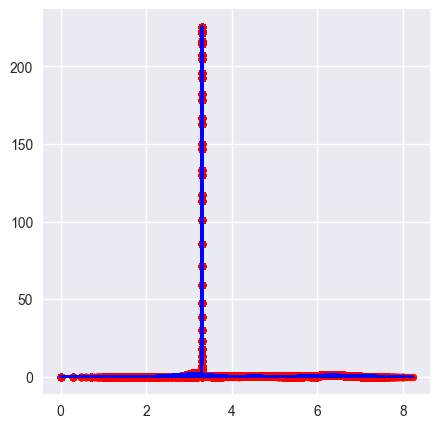

In [43]:
# Normal Distribution
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi))* np.exp(-(x-mean)**2/(2 * std**2))
    return y_out

# To generate an array of x
x = df
y = pdf(x)

# Plotting the normal_curve/bell_curve or gaussian distribution
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.plot(x,y,color='blue',linestyle='dashed')

plt.scatter(x,y,marker='o',s=25,color='red')